<a href="https://colab.research.google.com/github/Sonal-kumar1998/ANN_Based_Device_Modelling/blob/main/Pytorch_Python_Verilog_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
def inv_con_fn(vds, x):
  I_0 = 10**(-12) 
  x = np.power(10,x)
  x = np.multiply(x,vds)
  x  = I_0*x
  return x

# Input data 

In [3]:
data_path = "/content/drive/MyDrive/DDP/DC_model/Data/test_data_set.csv"
data_set = pd.read_csv(data_path)
data_set = data_set[data_set['#"gate OuterVoltage"'] == 1.1]
data_set = data_set.sort_values(by="drain OuterVoltage")
input = ['V_gs',	'V_ds',	'V_bs']

input_data = data_set[input]
voltage = ["V_ds"]
V_ds = data_set[voltage]
V_ds = V_ds.to_numpy()
data_set.head()

,Unnamed: 0,"#""gate OuterVoltage""",drain OuterVoltage,drain TotalCurrent,substrate OuterVoltage,source OuterVoltage,V_gs,V_ds,V_bs,converted_Ids
5628,61901,1.1,-4.660000e-37,-8.300000e-17,0.0,9.900000e-37,1.1,-1.456000e-36,-9.900000e-37,32.250692
27013,259328,1.1,4.470000e-36,3.910000e-16,-0.8,2.380000e-36,1.1,2.090000e-36,-8.000000e-01,31.941869
94554,941467,1.1,4.670000e-36,1.020000e-16,-0.2,1.190000e-35,1.1,-7.230000e-36,-2.000000e-01,31.339283
23636,235229,1.1,6.550000e-36,3.730000e-16,-0.9,-6.150000e-36,1.1,1.270000e-35,-9.000000e-01,31.755468
12381,121556,1.1,1.740000e-35,2.050000e-16,-1.0,1.790000e-35,1.1,-5.000000e-37,-1.000000e+00,31.071205


#DC Model in the Pytorch

In [4]:
# intanciate of DC Model
DC_model_path = '/content/drive/MyDrive/DDP/DC_model/Dc_Model/DC_10105.h5'
dc_model_pytorch= load_model(DC_model_path)
dc_model_pytorch.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [5]:
# DC currrent prediction before inversion function
Yds_pytorch = dc_model_pytorch.predict(input_data)
Ids_pytorch = inv_con_fn(V_ds, Yds_pytorch)

#DC model in the python


In [6]:
global w1,b1,w2,b2,w3,b3,w4,b4


# weights and bias of layer 1
w1 = dc_model_pytorch.layers[0].get_weights()[0]
d1 = dc_model_pytorch.layers[0].get_weights()[1]
b1 = d1.reshape(1,d1.shape[0])
# print(w1.shape)
# print(b1.shape)

# weights and bias of layer 2
w2 = dc_model_pytorch.layers[1].get_weights()[0]
d2 = dc_model_pytorch.layers[1].get_weights()[1]
b2 = d2.reshape(1,d2.shape[0])
# print(w2.shape)
# print(b2.shape)

# weights and bias of layer 3
w3 = dc_model_pytorch.layers[2].get_weights()[0]
d3 = dc_model_pytorch.layers[2].get_weights()[1]
b3 = d3.reshape(1,d3.shape[0])
# print(w3.shape)
# print(b3.shape)

# weights and bias of layer 4
w4 = dc_model_pytorch.layers[3].get_weights()[0]
d4 = dc_model_pytorch.layers[3].get_weights()[1]
b4 = d4.reshape(1,d4.shape[0])
# print(w4.shape)
# print(b4.shape)

In [7]:
#model_python
def dc_model_python(x):
  a1 =np.tanh(np.dot(x,w1)  + b1)
  a2 = np.tanh(np.dot(a1,w2) + b2)
  a3 = np.tanh(np.dot(a2,w3) + b3)
  a4 = np.dot(a3,w4) + b4
  # c = 10**(-12)
  # y1 = np.power(10,a4)
  # print(x.shape)
  # y2 = y1*x[0][1]
  # Ids = c*y2
  return a4

In [8]:
x_nump = input_data.to_numpy()
#print(x_nump.shape)
y_ds_python = dc_model_python(x_nump)
Ids_python = inv_con_fn(V_ds, y_ds_python )

Ids_python.shape

(12382, 1)

Text(0, 0.5, 'Yds')

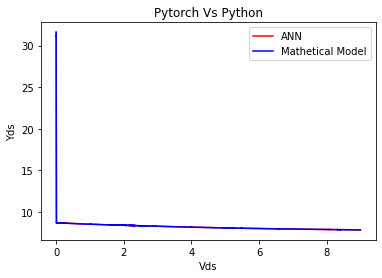

In [9]:
plt.plot(V_ds, Yds_pytorch, color="red",label = "ANN")
plt.plot(V_ds, y_ds_python, color="blue",label = "Mathetical Model")
plt.legend(loc ="upper right")
plt.title("Pytorch Vs Python")
plt.xlabel("Vds")
plt.ylabel("Yds")
#plt.savefig("output.png")

31.606813
7.8256483


Text(0.5, 1.0, 'Yds')

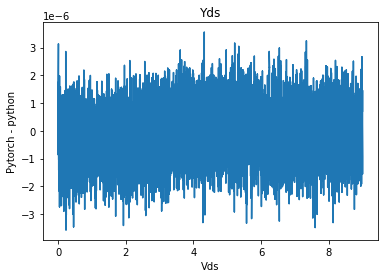

In [10]:
print(Yds_pytorch.max())
print(Yds_pytorch.min())
plt.plot(V_ds,  Yds_pytorch - y_ds_python)
#plt.title("Difference between ANN and Mathematical model")
plt.xlabel("Vds")
plt.ylabel("Pytorch - python")
plt.title("Yds")
#plt.savefig("relative_yds.png")

In [11]:
# plt.plot(V_ds, Ids_pytorch,label = "ANN")
# plt.plot(V_ds, Ids_python,label = "Mathetical Model")
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.legend(loc ="lower right")
# #plt.title("Comparision between ANN and Mathematical model")
# plt.xlabel("Vds")
# plt.ylabel("Yds")
# #plt.savefig("Ids.png")

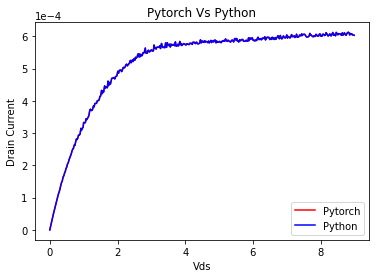

In [12]:
# print(type(V_ds))
# print(type(Ids_pytorch))
# print(type(Ids_python))
# print(V_ds.shape)
# print(Ids_pytorch.shape)
# print(Ids_python.shape)
V_ds_list = (V_ds.T).tolist()[0]
Ids_pytorch_list = (Ids_pytorch.T).tolist()[0]
Ids_python_list = (Ids_python.T).tolist()[0]
# print(len(V_ds_list))
# print(len(Ids_pytorch_list))
# print(len(Ids_python_list))
n = 30
V_ds_list = [V_ds_list[i] for i in range(1, len(V_ds_list), n)]
Ids_pytorch_list = [Ids_pytorch_list[i] for i in range(1, len(Ids_pytorch_list), n)]
Ids_python_list = [Ids_python_list[i] for i in range(1, len(Ids_python_list), n)]
# print(len(V_ds_list))
# print(len(Ids_pytorch_list))
# print(len(Ids_python_list))
plt.plot(V_ds_list, Ids_pytorch_list,label = "Pytorch", color = "r")
plt.plot(V_ds_list, Ids_python_list ,label = "Python", color = 'b')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend(loc ="lower right")
plt.title("Pytorch Vs Python")
plt.xlabel("Vds")
plt.ylabel("Drain Current")
plt.savefig("Ids_pytorch_python.png")

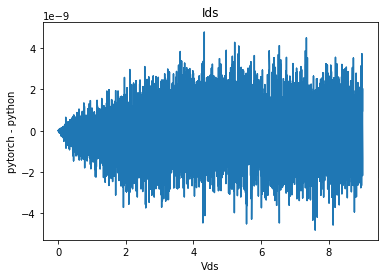

In [13]:
plt.plot(V_ds, Ids_pytorch- Ids_python)
plt.xlabel("Vds")
plt.ylabel("pytorch - python")
plt.title("Ids")
plt.savefig("relative_pytorch_python.png")

# Model in the verilog-a

In [14]:
def dc_model_verilog_a(V):
  w10 = [0.28561026, -1.1987576,  0.035404734]
  w11 = [0.28561026, -1.1987576,  0.035404734]
  w12 = [-5.6604018, -0.025396412, -0.040023163]
  w13 = [0.087847233,  186.82141,  1.1295451]
  w14 = [3.9908378, -0.66532516, -0.029740674]
  w15 = [0.32539603, -91.497322, -0.31589878]
  w16 = [-1.2867148,  0.13357331, -0.014167404]
  w17 = [-2.2547679,  0.0069422517, -0.027427338]
  w18 = [-0.078905769,  0.29380876, -0.032025822]
  w19 = [0.10708792,  7.4484096, -0.066626176]
  b1  = [-0.20026882,  0.11922879,  1.5453364,   0.08195057, -1.7808515,   0.2304061,  0.36992177,  0.7504497,  -0.20652157, -0.0896816]

  w20 = [0.537856, -0.09830168, -0.13949962, 1.5148432, 1.1379906, 0.39342505, -0.6730099, -1.148445, -0.18031363, 0.03118794]
  w21 = [0.26455194, -1.9114736, 1.1401272, 0.92864203, 0.6353045, 1.5899615, 0.43653044, -0.6698119, -0.02273074, -0.08627768]
  w22 = [0.24936286, 4.421175, 4.377462, -3.7644897, 2.519083, 7.1023426, -0.31717917, -0.7797747, 0.39239684, 0.41258836]
  w23 = [0.12465202, 0.07750362, -1.356123, -0.50228214, -1.263502, -0.06208649, 0.24573554, -1.3153042, -0.1269273, -0.17593679]
  w24 = [-0.04450439, -1.2739071, 2.210329, -6.1931014, 2.3447404, -0.45364913, -0.85488296, -0.2843409, -0.71766526, 0.08273758]
  w25 = [-0.11352942, -0.32819495, 0.14416045, 0.68048966, 0.08465008, 0.09865341, 1.1596516, -0.22459109, 0.93586457, -0.05719684]
  w26 = [-1.9365855, -0.15145455, 0.92252296, 0.63498485, -0.2604643, -1.1120566, 0.81784225, 1.4234469, 0.8188901, 1.062146]
  w27 = [-0.49939469, 0.02685997, -0.58980733, -0.94750875, -1.0966705, -0.21519971, -0.9113308, -0.32445982, 0.5712549, -0.14333673]
  w28 = [0.57412535, 1.8633165, -3.4403083, -6.5481625, 0.08858316, 3.9725633, -0.72191805, -0.8509305, 8.300041, 1.7285239]
  w29 = [-0.6349698, 0.70912987, 1.8322216, -8.722671, 3.1418834, 14.757689, 1.3385009, 3.147931, 1.254156, -1.8875655]
  b2  = [-0.09764316, -1.110255, -0.13661075, 1.4782246, -1.2015083, -0.8979334, -3.9384933, -0.5162159, -2.0378318, -1.6671207]

  w30 = [0.52744836, -0.14022988, -2.8671932, -2.2499733, 2.1836703, 0.59732169, 1.1199905, 0.13817640, 1.3216889, -9.1981211]
  w31 = [1.4890208, 0.13435327, -0.28264040, 0.36537871, -0.45720160, -0.15684803, -0.18839014, 0.37197873, -1.4263445, 1.4052831]
  w32 = [-0.0042333966, -0.37956825, 0.0087133525, 0.018496443, -0.56555510, -0.098922513, -0.32581753, -0.026991909, 0.0084790494, -0.024464734]
  w33 = [-1.3235840, 0.067255393, -0.22330180, -2.6134956, -0.74525779, -0.56566507, -0.68974704,  0.66479582, 2.0573246, -1.9159362]
  w34 = [-0.28395173, -0.16095938, -1.9902911, -0.85741490, -1.0009412, 0.092928432, 0.55211222, 0.16920313, 0.050174780, -0.17872147]
  b3  = [-2.878732, 1.9188049, 0.69974947, -2.3478692, -0.27443334]

  w40 = [-10.805246, 5.772061, 4.3736005, -5.8893104, -2.403235]
  b4 = 5.340328
  vds = V[1]
  a = V[0]
  b = V[1]
  c = V[2]
  a10 = math.tanh(a*w10[0] + b*w10[1] + c*w10[2] + b1[0]);
  a11 = math.tanh(a*w11[0] + b*w11[1] + c*w11[2] + b1[1]);
  a12 = math.tanh(a*w12[0] + b*w12[1] + c*w12[2] + b1[2]);
  a13 = math.tanh(a*w13[0] + b*w13[1] + c*w13[2] + b1[3]);
  a14 = math.tanh(a*w14[0] + b*w14[1] + c*w14[2] + b1[4]);
  a15 = math.tanh(a*w15[0] + b*w15[1] + c*w15[2] + b1[5]);
  a16 = math.tanh(a*w16[0] + b*w16[1] + c*w16[2] + b1[6]);
  a17 = math.tanh(a*w17[0] + b*w17[1] + c*w17[2] + b1[7]);
  a18 = math.tanh(a*w18[0] + b*w18[1] + c*w18[2] + b1[8]);
  a19 = math.tanh(a*w19[0] + b*w19[1] + c*w19[2] + b1[9]);


  a20 = math.tanh(a10*w20[0] + a11*w20[1] +a12*w20[2] +a13*w20[3] +a14*w20[4] +a15*w20[5] +a16*w20[6] +a17*w20[7] +a18*w20[8] +a19*w20[9] + b2[0]);
  a21 = math.tanh(a10*w21[0] + a11*w21[1] +a12*w21[2] +a13*w21[3] +a14*w21[4] +a15*w21[5] +a16*w21[6] +a17*w21[7] +a18*w21[8] +a19*w21[9] + b2[1]); 
  a22 = math.tanh(a10*w22[0] + a11*w22[1] +a12*w22[2] +a13*w22[3] +a14*w22[4] +a15*w22[5] +a16*w22[6] +a17*w22[7] +a18*w22[8] +a19*w22[9] + b2[2]); 
  a23 = math.tanh(a10*w23[0] + a11*w23[1] +a12*w23[2] +a13*w23[3] +a14*w23[4] +a15*w23[5] +a16*w23[6] +a17*w23[7] +a18*w23[8] +a19*w23[9] + b2[3]); 
  a24 = math.tanh(a10*w24[0] + a11*w24[1] +a12*w24[2] +a13*w24[3] +a14*w24[4] +a15*w24[5] +a16*w24[6] +a17*w24[7] +a18*w24[8] +a19*w24[9] + b2[4]);  
  a25 = math.tanh(a10*w25[0] + a11*w25[1] +a12*w25[2] +a13*w25[3] +a14*w25[4] +a15*w25[5] +a16*w25[6] +a17*w25[7] +a18*w25[8] +a19*w25[9] + b2[5]); 
  a26 = math.tanh(a10*w26[0] + a11*w26[1] +a12*w26[2] +a13*w26[3] +a14*w26[4] +a15*w26[5] +a16*w26[6] +a17*w26[7] +a18*w26[8] +a19*w26[9] + b2[6]); 
  a27 = math.tanh(a10*w27[0] + a11*w27[1] +a12*w27[2] +a13*w27[3] +a14*w27[4] +a15*w27[5] +a16*w27[6] +a17*w27[7] +a18*w27[8] +a19*w27[9] + b2[7]); 
  a28 = math.tanh(a10*w28[0] + a11*w28[1] +a12*w28[2] +a13*w28[3] +a14*w28[4] +a15*w28[5] +a16*w28[6] +a17*w28[7] +a18*w28[8] +a19*w28[9] + b2[8]); 
  a29 = math.tanh(a10*w29[0] + a11*w29[1] +a12*w29[2] +a13*w29[3] +a14*w29[4] +a15*w29[5] +a16*w29[6] +a17*w29[7] +a18*w29[8] +a19*w29[9] + b2[9]); 

  a30 = math.tanh(a20*w30[0] + a21*w30[1] +a22*w30[2] +a23*w30[3] +a24*w30[4] +a25*w30[5] +a26*w30[6] +a27*w30[7] +a28*w30[8] +a29*w30[9]  + b3[0]);
  a31 = math.tanh(a20*w31[0] + a21*w31[1] +a22*w31[2] +a23*w31[3] +a24*w31[4] +a25*w31[5] +a26*w31[6] +a27*w31[7] +a28*w31[8] +a29*w31[9]  + b3[1]);
  a32 = math.tanh(a20*w32[0] + a21*w32[1] +a22*w32[2] +a23*w32[3] +a24*w32[4] +a25*w32[5] +a26*w32[6] +a27*w32[7] +a28*w32[8] +a29*w32[9]  + b3[2]);
  a33 = math.tanh(a20*w33[0] + a21*w33[1] +a22*w33[2] +a23*w33[3] +a24*w33[4] +a25*w33[5] +a26*w33[6] +a27*w33[7] +a28*w33[8] +a29*w33[9]  + b3[3]);
  a34 = math.tanh(a20*w34[0] + a21*w34[1] +a22*w34[2] +a23*w34[3] +a24*w34[4] +a25*w34[5] +a26*w34[6] +a27*w34[7] +a28*w34[8] +a29*w34[9]  + b3[4]);
  a40 = a30*w40[0] + a31*w40[1] + a32*w40[2] + a33*w40[3] + a34*w40[4] + b4;
  
  Ids = math.pow(10,-12)*vds*math.pow(10,a40)
  return Ids 

In [15]:
dc_model_verilog_a([1.2,5.0,0])

0.000659841227277236

In [16]:
input_verilogs = input_data.values.tolist()
output_verilogs = []
Vds_verilog = []
for input_verilog in input_verilogs:
  output_verilog = dc_model_verilog_a(input_verilog)
  output_verilogs.append(output_verilog)
  Vds_verilog.append(input_verilog[1])

print(len(Vds_verilog))
n = 30
output_verilogs = [output_verilogs[i] for i in range(1, len(output_verilogs), n)]
Vds_verilog  = [Vds_verilog [i] for i in range(1, len(Vds_verilog), n)]
print(len(Vds_verilog))

12382
413


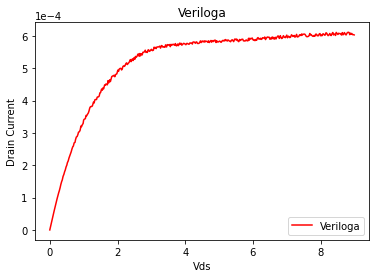

In [17]:
plt.plot(Vds_verilog, output_verilogs,label = "Veriloga", color = "r")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend(loc ="lower right")
plt.title("Veriloga")
plt.xlabel("Vds")
plt.ylabel("Drain Current")
plt.savefig("Ids_Veriloga.png")

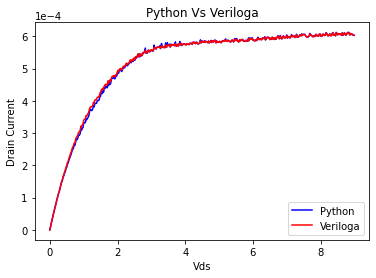

In [18]:
plt.plot(V_ds_list, Ids_python_list ,label = "Python", color = 'b')
plt.plot(Vds_verilog, output_verilogs,label = "Veriloga", color = "r")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend(loc ="lower right")
plt.title("Python Vs Veriloga")
plt.xlabel("Vds")
plt.ylabel("Drain Current")
plt.savefig("Ids_Python_Veriloga.png")

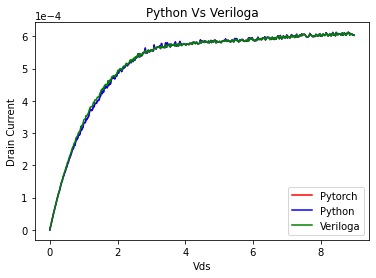

In [19]:
plt.plot(V_ds_list, Ids_pytorch_list,label = "Pytorch", color = "r")
plt.plot(V_ds_list, Ids_python_list ,label = "Python", color = 'b')
plt.plot(Vds_verilog, output_verilogs,label = "Veriloga", color = "g")

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend(loc ="lower right")
plt.title("Python Vs Veriloga")
plt.xlabel("Vds")
plt.ylabel("Drain Current")
plt.savefig("Ids_Pytorch_Python_Veriloga.png")

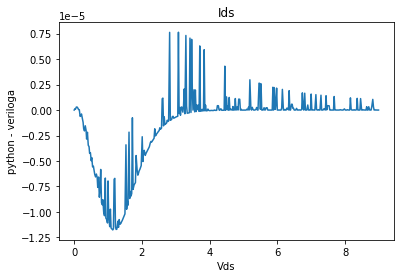

In [20]:
plt.plot(np.array(V_ds_list), np.array(Ids_python_list) - np.array(output_verilogs))
plt.xlabel("Vds")
plt.ylabel("python - veriloga")
plt.title("Ids")
plt.savefig("relative_python_veriloga.png")